# Benchmark on all dataset

In [4]:
# Benchmark all models produced in this study
from models.deepprime import predict as deepprime_predict
from models.pridict import predict as pridict_predict
from models.transformer import predict as transformer_predict
from models.ensemble_adaboost import predict as ensemble_adaboost_predict
from models.ensemble_bagging import predict as ensemble_bagging_predict
from models.ensemble_weighted_mean import predict as ensemble_weighted_mean_predict
from models.conventional_ml_models import mlp_predict, random_forest_predict, xgboost_predict, ridge_predict
from glob import glob
from os.path import join as pjoin, basename

import os
import contextlib
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr

import warnings
warnings.filterwarnings("ignore")

models = {
    'dp': deepprime_predict,
    'pd': pridict_predict,
    'tr': transformer_predict,
    'ada': ensemble_adaboost_predict,
    'bag': ensemble_bagging_predict,
    'pwm': ensemble_weighted_mean_predict,
    'mlp': mlp_predict,
    'rf': random_forest_predict,
    'xgb': xgboost_predict,
    'ridge': ridge_predict
}
# run predictions on all models on each dataset, calculate the pearson and spearman correlation
performance_p = {}
performance_s = {}

for data in glob(pjoin('models', 'data', 'std', '*.csv')):
    data_name = basename(data)
    print(data_name)
    df = pd.read_csv(data)
    # drop nan values
    df = df.dropna()
    target = df.iloc[:, -2]
    target = target.values
    target = target.astype(np.float32)

    performances_pearson = {}
    performances_spearman = {}
    # run predictions on all models
    for model in models:
        pearsons = []
        spearmans = []

        m = models[model]
        print(model)
        # collect the printout of the function
        with open(os.devnull, 'w') as f:
            with contextlib.redirect_stdout(f):
                predictions = m(data_name)
        
        for fold in range(5):
            # calculate the pearson and spearman correlation
            target_fold = target[df['fold'] == fold]
            predictions_fold = predictions.get(fold).flatten()
            # print(predictions)
            pearson = pearsonr(target_fold, predictions_fold)[0]
            spearman = spearmanr(target_fold, predictions_fold)[0]
            print(f'Fold {fold}: Pearson: {pearson}, Spearman: {spearman}')
            pearsons.append(pearson)
            spearmans.append(spearman)
        performances_pearson[model] = pearsons
        performances_spearman[model] = spearmans

    
    performance_p[data_name] = performances_pearson
    performance_s[data_name] = performances_spearman

# save the results
df_p = pd.DataFrame(performance_p)
df_s = pd.DataFrame(performance_s)
df_p.to_csv(pjoin('models', 'data', 'performance', 'all_models_pearson.csv'))
df_s.to_csv(pjoin('models', 'data', 'performance', 'all_models_spearman.csv'))

std-dp_small-hek293t-pe2.csv
dp
Fold 0: Pearson: 0.6797325428668728, Spearman: 0.565719935806897
Fold 1: Pearson: 0.538905873526943, Spearman: 0.558475831784042
Fold 2: Pearson: 0.4442011394003913, Spearman: 0.5586243522394836
Fold 3: Pearson: 0.49988335656996696, Spearman: 0.47491820675511387
Fold 4: Pearson: 0.5015146108991999, Spearman: 0.48863103818227643
pd
Fold 0: Pearson: 0.6139258974762143, Spearman: 0.5848158159719994
Fold 1: Pearson: 0.5889427248838501, Spearman: 0.6198352184027417
Fold 2: Pearson: 0.5938391655516249, Spearman: 0.6354717781168897
Fold 3: Pearson: 0.5650649310930191, Spearman: 0.5213789110669335
Fold 4: Pearson: 0.6894748697501996, Spearman: 0.5516805674049993
tr
Fold 0: Pearson: 0.4074551294850721, Spearman: 0.491254311002478
Fold 1: Pearson: 0.4351287577351286, Spearman: 0.4951366722081368
Fold 2: Pearson: 0.36296771886432566, Spearman: 0.5020338026167589
Fold 3: Pearson: 0.36370286496043036, Spearman: 0.44916076388356924
Fold 4: Pearson: 0.5551721373369674,

/tmp/ipykernel_4348/675446574.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pearson = df_pearson.applymap(lambda x: literal_eval(x))
/tmp/ipykernel_4348/675446574.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spearman = df_spearman.applymap(lambda x: literal_eval(x))


ada is significantly better than pd and dp on std-pd-hek293t-pe2.csv
bag is significantly better than pd and dp on std-pd-hek293t-pe2.csv
pwm is significantly better than pd and dp on std-pd-hek293t-pe2.csv
ada is significantly better than pd and dp on std-dp_small-hek293t-nrch_pe2.csv
bag is significantly better than pd and dp on std-dp_small-hek293t-nrch_pe2.csv
pwm is significantly better than pd and dp on std-dp_small-hek293t-nrch_pe2.csv
ada is significantly better than pd and dp on std-dp_small-dld1-nrch_pe4max.csv
bag is significantly better than pd and dp on std-dp_small-dld1-nrch_pe4max.csv
pwm is significantly better than pd and dp on std-dp_small-dld1-nrch_pe4max.csv
ada is significantly better than pd and dp on std-dp_small-nih3t3-nrch_pe4max.csv
bag is significantly better than pd and dp on std-dp_small-nih3t3-nrch_pe4max.csv
pwm is significantly better than pd and dp on std-dp_small-nih3t3-nrch_pe4max.csv
ada is significantly better than pd and dp on std-dp_small-hek293t-

/tmp/ipykernel_4348/675446574.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pearson_mean = df_pearson.applymap(np.mean)
/tmp/ipykernel_4348/675446574.py:42: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spearman_mean = df_spearman.applymap(np.mean)
/tmp/ipykernel_4348/675446574.py:43: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pearson_mean = df_pearson_mean.applymap(lambda x: round(x, 2))
/tmp/ipykernel_4348/675446574.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spearman_mean = df_spearman_mean.applymap(lambda x: round(x, 2))
/tmp/ipykernel_4348/675446574.py:45: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pearson_mean = df_pearson_mean.applymap(lambda x: abs(x))
/tmp/ipykernel_4348/675446574.py:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFram

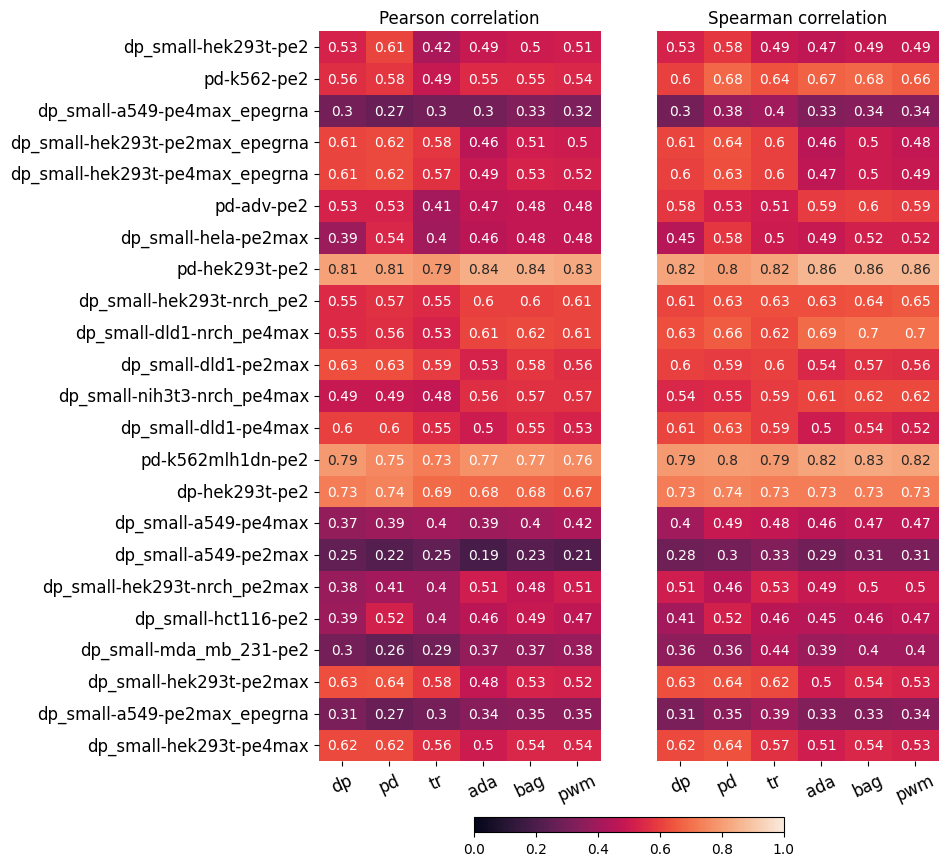

In [22]:
# plot the mean performance of each model vs dataset
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin

from ast import literal_eval
import numpy as np
import pandas as pd

df_pearson = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_pearson.csv'), index_col=0)
df_spearman = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_spearman.csv'), index_col=0)
# each cell is a list
df_pearson = df_pearson.applymap(lambda x: literal_eval(x))
df_spearman = df_spearman.applymap(lambda x: literal_eval(x))


# perform paried t test between pd, dp and all other models
from scipy.stats import ttest_rel
for dataset in df_pearson.columns:
    for model in ['tr', 'ada', 'bag', 'pwm']:
        if model in ['pd', 'dp']:
            continue
        t_pd, p_pd = ttest_rel(df_pearson.loc['pd', dataset], df_pearson.loc[model, dataset])
        t_dp, p_dp = ttest_rel(df_pearson.loc['dp', dataset], df_pearson.loc[model, dataset])
        # if performance of pd and dp is significantly lower than the model
        if p_pd < 0.05 and p_dp < 0.05 and np.mean(df_pearson.loc[model, dataset]) > np.mean(df_pearson.loc['pd', dataset]) and np.mean(df_pearson.loc[model, dataset]) > np.mean(df_pearson.loc['dp', dataset]):
            print(f'{model} is significantly better than pd and dp on {dataset}')

print('Spearman')
# do the same for spearman
for dataset in df_spearman.columns:
    for model in ['tr', 'ada', 'bag', 'pwm']:
        if model in ['pd', 'dp']:
            continue
        t_pd, p_pd = ttest_rel(df_spearman.loc['pd', dataset], df_spearman.loc[model, dataset])
        t_dp, p_dp = ttest_rel(df_spearman.loc['dp', dataset], df_spearman.loc[model, dataset])
        # if performance of pd and dp is significantly lower than the model
        if p_pd < 0.05 and p_dp < 0.05 and t_pd < 0 and t_dp < 0:
            print(f'{model} is significantly better than pd and dp on {dataset}')

df_pearson_mean = df_pearson.applymap(np.mean)
df_spearman_mean = df_spearman.applymap(np.mean)
df_pearson_mean = df_pearson_mean.applymap(lambda x: round(x, 2))
df_spearman_mean = df_spearman_mean.applymap(lambda x: round(x, 2))
df_pearson_mean = df_pearson_mean.applymap(lambda x: abs(x))
df_spearman_mean = df_spearman_mean.applymap(lambda x: abs(x))
df_pearson_mean = df_pearson_mean.T
df_spearman_mean = df_spearman_mean.T

# drop columns of mlp, rf, xgb, ridge
df_pearson_mean = df_pearson_mean.drop(columns=['mlp', 'rf', 'xgb', 'ridge'])
df_spearman_mean = df_spearman_mean.drop(columns=['mlp', 'rf', 'xgb', 'ridge'])

print(df_pearson_mean)
# plot the results in heatmap
fig, axes = plt.subplots(1, 2, figsize=(8, 12))
sns.heatmap(df_pearson_mean, annot=True, ax=axes[0], vmin=0, vmax=1, cbar=False)
axes[0].set_title('Pearson correlation')
sns.heatmap(df_spearman_mean, annot=True, ax=axes[1], vmin=0, vmax=1, cbar=False)
axes[1].set_title('Spearman correlation')
# axes 1 should have no y label
# use one cbar for both axes
fig.colorbar(axes[0].collections[0], ax=axes, location='bottom'
             ,orientation='horizontal', shrink=0.5, pad=0.06)
axes[1].set_ylabel('')
axes[1].set_yticks([])

# remove the suffix of the dataset name at y axis
axes[0].set_yticklabels(['-'.join(x.split('.')[0].split('-')[1:]) for x in df_pearson_mean.index])

# update font size of the axes
for ax in axes:
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=25)
# plt.tight_layout()
plt.savefig(pjoin('dissertation', 'figures', 'all_models_performance.png'), dpi=300, bbox_inches='tight')

# Benchmark on Individual Edit Types

In [1]:
# Benchmark all models produced in this study
from models.deepprime import predict as deepprime_predict
from models.pridict import predict as pridict_predict
from models.transformer import predict as transformer_predict
from models.ensemble_adaboost import predict as ensemble_adaboost_predict
from models.ensemble_bagging import predict as ensemble_bagging_predict
from models.ensemble_weighted_mean import predict as ensemble_weighted_mean_predict
from models.conventional_ml_models import mlp_predict, random_forest_predict, xgboost_predict, ridge_predict
from glob import glob
from os.path import join as pjoin, basename

import os
import contextlib
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

models = {
    'dp': deepprime_predict,
    'pd': pridict_predict,
    'tr': transformer_predict,
    'ada': ensemble_adaboost_predict,
    'bag': ensemble_bagging_predict,
    'pwm': ensemble_weighted_mean_predict,
    # 'mlp': mlp_predict,
    # 'rf': random_forest_predict,
    # 'xgb': xgboost_predict,
    # 'ridge': ridge_predict
}
# run predictions on all models on each dataset, calculate the pearson and spearman correlation
performance_p = defaultdict(list)
performance_s = defaultdict(list)
# performance_p = []
# performance_s = []

datasets = glob(pjoin('models', 'data', 'std', '*.csv'))
datasets = [x for x in datasets if 'small' not in x]
datasets = [basename(x).split('.')[0] for x in datasets]
datasets = [x.replace('std-', '') for x in datasets]

for model in models:
    for data in glob(pjoin('models', 'data', 'std', '*.csv')):
        data_name = basename(data)
        data_f = data_name
        data_name = data_name.split('.')[0]
        data_name = data_name.replace('std-', '')
        if 'small' in data_name:
            continue
        print(data_name)
        df = pd.read_csv(data)
        # drop nan values
        df = df.dropna()
        target = df.iloc[:, -2]
        target = target.values
        target = target.astype(np.float32)

        sub_mask = df['mut-type'] == 0
        ins_mask = df['mut-type'] == 1
        del_mask = df['mut-type'] == 2

        # performances_pearson = {}
        # performances_spearman = {}
        performances_pearson = [[] for _ in range(3)]
        performances_spearman = [[] for _ in range(3)]


        m = models[model]
        print(model)
        # collect the printout of the function
        with open(os.devnull, 'w') as f:
            with contextlib.redirect_stdout(f):
                predictions = m(data_f)
        
        for fold in range(5):
            # calculate the pearson and spearman correlation
            target_fold = target[df['fold'] == fold]
            predictions_fold = np.array(predictions.get(fold).flatten())

            sub_mask_fold = sub_mask[df['fold'] == fold]
            ins_mask_fold = ins_mask[df['fold'] == fold]
            del_mask_fold = del_mask[df['fold'] == fold]

            target_fold_sub = target_fold[sub_mask_fold]
            predictions_fold_sub = predictions_fold[sub_mask_fold]
            target_fold_ins = target_fold[ins_mask_fold]
            predictions_fold_ins = predictions_fold[ins_mask_fold]
            target_fold_del = target_fold[del_mask_fold]
            predictions_fold_del = predictions_fold[del_mask_fold]

            # calculate the pearson and spearman correlation
            pearson_sub = pearsonr(target_fold_sub, predictions_fold_sub)[0]
            spearman_sub = spearmanr(target_fold_sub, predictions_fold_sub)[0]
            pearson_ins = pearsonr(target_fold_ins, predictions_fold_ins)[0]
            spearman_ins = spearmanr(target_fold_ins, predictions_fold_ins)[0]
            pearson_del = pearsonr(target_fold_del, predictions_fold_del)[0]
            spearman_del = spearmanr(target_fold_del, predictions_fold_del)[0]

            # pearsons['sub'].append(pearson_sub)
            # spearmans['sub'].append(spearman_sub)
            # pearsons['ins'].append(pearson_ins)
            # spearmans['ins'].append(spearman_ins)
            # pearsons['del'].append(pearson_del)
            # spearmans['del'].append(spearman_del)

            performances_pearson[0].append(pearson_sub)
            performances_pearson[1].append(pearson_ins)
            performances_pearson[2].append(pearson_del)
            performances_spearman[0].append(spearman_sub)
            performances_spearman[1].append(spearman_ins)
            performances_spearman[2].append(spearman_del)
        # performances_pearson[data_name] = pearsons
        # performances_spearman[data_name] = spearmans
        print(performances_pearson)
        print(performances_spearman)

        performance_p[model]+= performances_pearson
        performance_s[model]+= performances_spearman
    # performance_p.append(performances_pearson)
    # performance_s.append(performances_spearman)

print(performance_p)
print(performance_s)

# save the results with multi index, the first level is the dataset name, the second level is the mutation type
index = pd.MultiIndex.from_product([datasets, ['sub', 'ins', 'del']], names=['dataset', 'mut-type'])
df_p = pd.DataFrame(performance_p, index=index)
df_s = pd.DataFrame(performance_s, index=index)

df_p.to_csv(pjoin('models', 'data', 'performance', 'all_models_pearson-edits.csv'))
df_s.to_csv(pjoin('models', 'data', 'performance', 'all_models_spearman-edits.csv'))

/home/peiheng/anaconda3/envs/dl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pd-k562-pe2
dp
[[0.46604674467439366, 0.5183533991466369, 0.4717318836479554, 0.4924717827275593, 0.5134406322709282], [0.659657390592642, 0.6657552405809071, 0.6663538640507127, 0.6284439765163139, 0.721146890469397], [0.20167529420228902, 0.2909392675072411, 0.17221468035196352, 0.20521945703927713, 0.22211013903721621]]
[[0.5808124821348434, 0.5727594411574325, 0.5608770483138323, 0.565844784530103, 0.5845544507599307], [0.7338030639483146, 0.7237776831088517, 0.7448265434541153, 0.7465897776633249, 0.7327159358802181], [0.2911294224126209, 0.42684591577796493, 0.304596495720173, 0.35082370045106437, 0.3554270858948366]]
pd-adv-pe2
dp
[[0.41905843151328526, 0.4486001835241826, 0.4372015352028029, 0.485938410559541, 0.457607275681577], [0.5589685090665455, 0.6910609402821848, 0.6181108605188506, 0.5828568229522659, 0.6418683493876323], [0.0673700434736304, 0.11924914682256826, 0.12023414068607963, 0.053272186543210864, 0.10487298790178556]]
[[0.48140397716911376, 0.48750336375735365,

ada is slightly better than pd and dp on pd-adv-pe2 for del, with p values 0.9806037421206205 and 0.2861185606217322
bag is slightly better than pd and dp on pd-adv-pe2 for del, with p values 0.7122515236134563 and 0.14963949141118396
pwm is slightly better than pd and dp on pd-adv-pe2 for del, with p values 0.7233269447051607 and 0.18619577610099985
tr is slightly better than pd and dp on pd-hek293t-pe2 for ins, with p values 0.19627913315198012 and 0.08540576516892782
ada is slightly better than pd and dp on pd-hek293t-pe2 for del, with p values 0.026617407515720615 and 0.18353698136022045
ada is significantly better than pd and dp on pd-hek293t-pe2 for ins
ada is significantly better than pd and dp on pd-hek293t-pe2 for sub
bag is slightly better than pd and dp on pd-hek293t-pe2 for del, with p values 0.031711859289859756 and 0.2367746375215319
bag is significantly better than pd and dp on pd-hek293t-pe2 for ins
bag is significantly better than pd and dp on pd-hek293t-pe2 for sub
pw

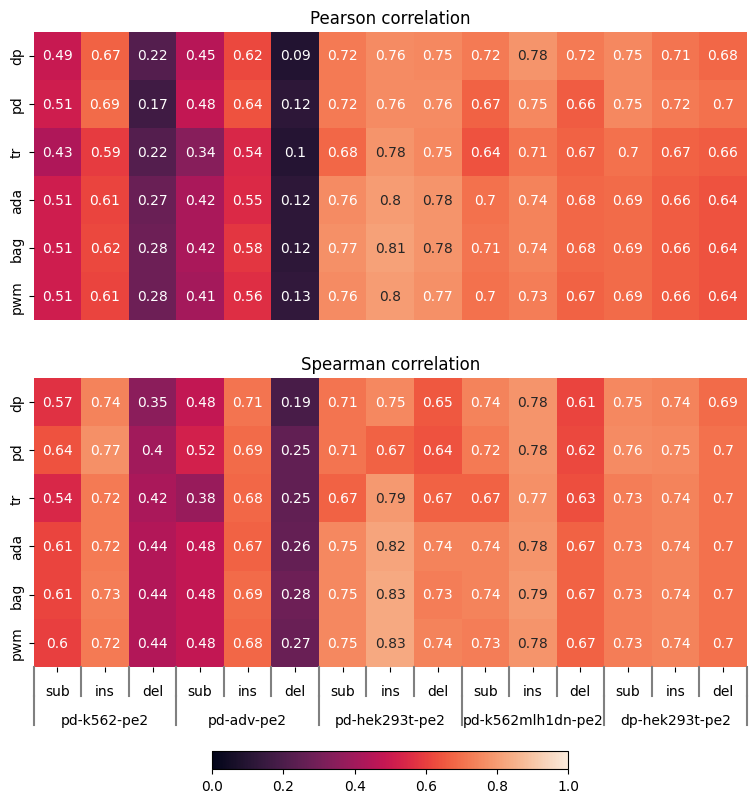

In [21]:
# plot the mean performance of each model vs dataset
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as pjoin

from ast import literal_eval
import numpy as np
import pandas as pd
from itertools import groupby

df_pearson = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_pearson-edits.csv'), index_col=[0, 1])
df_spearman = pd.read_csv(pjoin('models', 'data', 'performance', 'all_models_spearman-edits.csv'), index_col=[0, 1])

# each cell is a list
df_pearson = df_pearson.applymap(lambda x: literal_eval(x))
df_spearman = df_spearman.applymap(lambda x: literal_eval(x))

# perform statistical test between pd, dp and all other models
from scipy.stats import ttest_rel
for dataset in df_pearson.index.levels[0]:
    for model in ['tr', 'ada', 'bag', 'pwm']:
        for mut_type in df_pearson.index.levels[1]:
            t_pd, p_pd = ttest_rel(df_pearson.loc[(dataset, mut_type), 'pd'], df_pearson.loc[(dataset, mut_type), model])
            t_dp, p_dp = ttest_rel(df_pearson.loc[(dataset, mut_type), 'dp'], df_pearson.loc[(dataset, mut_type), model])
            # if performance of pd and dp is significantly lower than the model
            if p_pd < 0.05 and p_dp < 0.05 and t_pd < 0 and t_dp < 0:
                print(f'{model} is significantly better than pd and dp on {dataset} for {mut_type}')
            elif t_pd < 0 and t_dp < 0:
                print(f'{model} is slightly better than pd and dp on {dataset} for {mut_type}, with p values {p_pd} and {p_dp}')

# use dataset as primary y axis, and mut-type as secondary y axis
df_pearson_mean = df_pearson.applymap(np.mean)
df_spearman_mean = df_spearman.applymap(np.mean)
df_pearson_mean = df_pearson_mean.applymap(lambda x: round(x, 2))
df_spearman_mean = df_spearman_mean.applymap(lambda x: round(x, 2))
df_pearson_mean = df_pearson_mean.applymap(lambda x: abs(x))
df_spearman_mean = df_spearman_mean.applymap(lambda x: abs(x))


# plot with dataset as primary y axis
fig, axes = plt.subplots(2, 1, figsize=(9.2, 11))
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1

sns.heatmap(df_pearson_mean.T, annot=True, ax=axes[0], vmin=0, vmax=1, cbar=False)
axes[0].set_title('Pearson correlation')
sns.heatmap(df_spearman_mean.T, annot=True, ax=axes[1], vmin=0, vmax=1, cbar=False)
axes[1].set_title('Spearman correlation')
# use one cbar for both axes
fig.colorbar(axes[0].collections[0], ax=axes, location='bottom'
             ,orientation='horizontal', shrink=0.5, pad=0.1)
axes[0].set_xlabel('')
axes[0].set_xticks([])
axes[1].set_xlabel('')

# replace y tick labels with secondary y axis
axes[1].set_xticklabels([])
label_group_bar_table(axes[1], df_pearson_mean)
# # set the y axis label
# axes[0].set_ylabel('Model')
# axes[1].set_ylabel('Model')
# save the figure
plt.savefig(pjoin('dissertation', 'figures', 'all_models_performance-edits.png'), dpi=300, bbox_inches='tight')